In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

print("Tensorflow version: "+ tf.__version__)

Tensorflow version: 2.9.2


In [2]:
# Google file system
from google.colab import drive
drive.mount('/GoogleDrive', force_remount=True)

ATT_FILE =   "/GoogleDrive/My Drive/Colab Notebooks/RedesNeuronales/datasets/Fifa/FootballPlayerPreparedCleanAttributes.csv"
LABEL_FILE = "/GoogleDrive/My Drive/Colab Notebooks/RedesNeuronales/datasets/Fifa/FootballPlayerOneHotEncodedClasses.csv"

attributes = pd.read_csv(ATT_FILE)
label =      pd.read_csv(LABEL_FILE)

Mounted at /GoogleDrive


## Datasets

In [3]:
TRAIN_RATE = 0.8

n_instances = attributes.shape[0]

n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)
n_final_test = n_instances-n_train-n_dev

In [4]:
print("Total:", n_instances, "| Train:", n_train, "| Dev Test:", n_dev," | Final Test:", n_final_test)

Total: 16122 | Train: 12897 | Dev Test: 1612  | Final Test: 1613


In [5]:
x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train + n_dev]
t_dev = label.values[n_train:n_train + n_dev]

x_final_test = attributes.values[n_train+n_dev:n_instances]
t_final_test = label.values[n_train+n_dev:n_instances]

INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]

In [6]:
print ("X_train:", x_train.shape, "| T_train:", t_train.shape)
print ("X_dev:", x_dev.shape, "| T_dev:", t_dev.shape)
print ("X_test:", x_final_test.shape, "| T_test:", t_final_test.shape)

X_train: (12897, 17) | T_train: (12897, 4)
X_dev: (1612, 17) | T_dev: (1612, 4)
X_test: (1613, 17) | T_test: (1613, 4)


## Model

In [7]:
n_neurons_per_layer = [500, 250, 75, 25]
learning_rate = 0.1
n_epochs = 1000 
batch_size = 512

In [8]:
model = keras.Sequential(name = "FifaNetwork")

In [9]:
model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))

for neurons in n_neurons_per_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))

model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

In [10]:
model.summary()

Model: "FifaNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               9000      
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 75)                18825     
                                                                 
 dense_3 (Dense)             (None, 25)                1900      
                                                                 
 dense_4 (Dense)             (None, 4)                 104       
                                                                 
Total params: 155,079
Trainable params: 155,079
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ["categorical_accuracy"])

## Training

In [12]:
start = time.perf_counter()

In [13]:
history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs = n_epochs, 
                    verbose = 1, 
                    validation_data = (x_dev, t_dev))

Epoch 1/1000
26/26 [==============================] - 1s 28ms/step - loss: 1.3189 - categorical_accuracy: 0.4644 - val_loss: 1.2218 - val_categorical_accuracy: 0.5093
Epoch 2/1000
26/26 [==============================] - 1s 19ms/step - loss: 1.1009 - categorical_accuracy: 0.5352 - val_loss: 0.9919 - val_categorical_accuracy: 0.5744
Epoch 3/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.8910 - categorical_accuracy: 0.6312 - val_loss: 0.8320 - val_categorical_accuracy: 0.6390
Epoch 4/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.7411 - categorical_accuracy: 0.7023 - val_loss: 0.6872 - val_categorical_accuracy: 0.7227
Epoch 5/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.6374 - categorical_accuracy: 0.7396 - val_loss: 0.6175 - val_categorical_accuracy: 0.7432
Epoch 6/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.5915 - categorical_accuracy: 0.7415 - val_loss: 0.6260 - val_categorical_accuracy: 0.706

In [14]:
results = pd.DataFrame(history.history)

In [16]:
print ("Time: ", time.perf_counter() - start, "seconds")

human_error = 10
train_error = 100 - (results.categorical_accuracy.values[-1:][0] * 100)
test_error = 100 - (results.val_categorical_accuracy.values[-1:][0] * 100)

print ("Training Set Error: ", train_error, "%")
print ("Development Set Test Error: ", test_error, "%")
print ("Bias: ", train_error - human_error, "%")
print ("Variance: ", test_error - train_error, "%")

Time:  661.070671792 seconds
Training Set Error:  0.0 %
Development Set Test Error:  22.518610954284668 %
Bias:  -10.0 %
Variance:  22.518610954284668 %


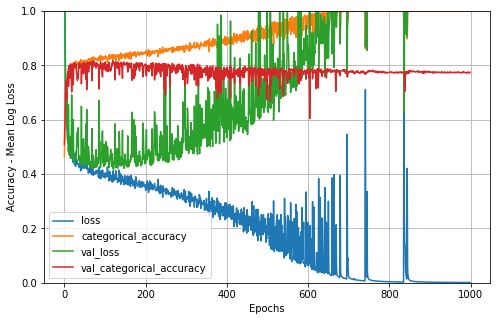

In [17]:
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
dev_predictions=model.predict(x_dev).round(2)
dev_predictions[:20]

51/51 [==============================] - 0s 2ms/step


array([[0.09, 0.91, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.73, 0.27, 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.03, 0.97, 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.6 , 0.4 , 0.  ],
       [0.2 , 0.01, 0.69, 0.1 ]], dtype=float32)

In [19]:
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [20]:
t_dev[:20] #target classes

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [21]:
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(t_dev,1))
print (dev_correct_predictions[:30])

[False  True  True  True False False False False  True  True  True False
 False False  True False False  True False False  True  True  True False
  True  True  True  True False  True]


In [22]:
from collections import Counter
Counter (dev_correct_predictions)

Counter({False: 363, True: 1249})

## Final Test

In [23]:
final_results = model.evaluate(x_final_test, t_final_test)

print ("Final Test Accuracy: ", final_results[1] * 100, "%")

51/51 [==============================] - 0s 7ms/step - loss: 1.7197 - categorical_accuracy: 0.7824
Final Test Accuracy:  78.23930382728577 %
